<a href="https://colab.research.google.com/github/cuongle2002/BTVNW5-FUZZYLOGIC-/blob/main/adaptive_food_suggestion_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d8f49295f1bd2d2c2dff2f00336a848f1272c4f8d9dfd67da1ba1d558e26fb2e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


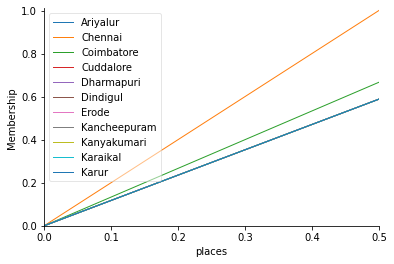

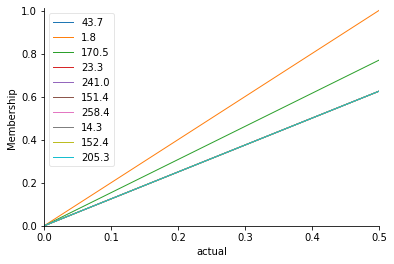

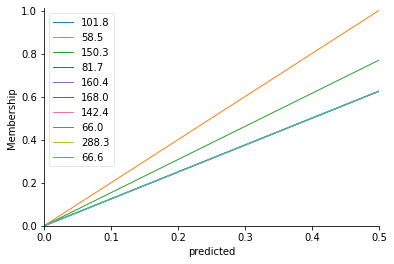

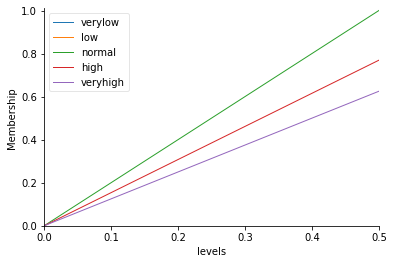

In [3]:
#07550755
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

places = ctrl.Antecedent(np.arange(0,1,0.5), 'places')
actual = ctrl.Antecedent(np.arange(0,1,0.5), 'actual')
predicted = ctrl.Antecedent(np.arange(0,1,0.5), 'predicted')
levels = ctrl.Consequent(np.arange(0,1,0.5), 'levels')
places['Ariyalur'] = fuzz.trimf(places.universe,[0, 0.25, 0.5])
places['Chennai'] = fuzz.trimf(places.universe,[0, 0.5, 0.75])
places['Coimbatore'] = fuzz.trimf(places.universe,[0, 0.75, 0.9])
places['Cuddalore'] = fuzz.trimf(places.universe,[0, 0.85, 1])
places['Dharmapuri'] = fuzz.trimf(places.universe,[0, 0.85, 1])
places['Dindigul'] = fuzz.trimf(places.universe,[0, 0.85, 1])
places['Erode'] = fuzz.trimf(places.universe,[0, 0.85, 1])
places['Kancheepuram'] = fuzz.trimf(places.universe,[0, 0.85, 1])
places['Kanyakumari'] = fuzz.trimf(places.universe,[0, 0.85, 1])
places['Karaikal'] = fuzz.trimf(places.universe,[0, 0.85, 1])
places['Karur'] = fuzz.trimf(places.universe,[0, 0.85, 1])

actual['43.7'] = fuzz.trimf(actual.universe,[0, 0.25, 0.5])
actual['1.8'] = fuzz.trimf(actual.universe,[0, 0.5, 0.65])
actual['170.5'] = fuzz.trimf(actual.universe,[0, 0.65, 0.8])
actual['23.3'] = fuzz.trimf(actual.universe,[0, 0.8, 1])
actual['241.0'] = fuzz.trimf(actual.universe,[0, 0.8, 1])
actual['151.4'] = fuzz.trimf(actual.universe,[0, 0.8, 1])
actual['258.4'] = fuzz.trimf(actual.universe,[0, 0.8, 1])
actual['14.3'] = fuzz.trimf(actual.universe,[0, 0.8, 1])
actual['152.4'] = fuzz.trimf(actual.universe,[0, 0.8, 1])
actual['205.3'] = fuzz.trimf(actual.universe,[0, 0.8, 1])

predicted['101.8'] = fuzz.trimf(predicted.universe,[0, 0.25, 0.5])
predicted['58.5'] = fuzz.trimf(predicted.universe,[0, 0.5, 0.65])
predicted['150.3'] = fuzz.trimf(predicted.universe,[0, 0.65, 0.8])
predicted['81.7'] = fuzz.trimf(predicted.universe,[0, 0.8, 1])
predicted['160.4'] = fuzz.trimf(predicted.universe,[0, 0.8, 1])
predicted['168.0'] = fuzz.trimf(predicted.universe,[0, 0.8, 1])
predicted['142.4'] = fuzz.trimf(predicted.universe,[0, 0.8, 1])
predicted['66.0'] = fuzz.trimf(predicted.universe,[0, 0.8, 1])
predicted['288.3'] = fuzz.trimf(predicted.universe,[0, 0.8, 1])
predicted['66.6'] = fuzz.trimf(predicted.universe,[0, 0.8, 1])

levels['verylow'] = fuzz.trimf(levels.universe,[0, 0.1, 0.4])
levels['low'] = fuzz.trimf(levels.universe,[0, 0.25, 0.5])
levels['normal'] = fuzz.trimf(levels.universe,[0, 0.5, 0.65])
levels['high'] = fuzz.trimf(levels.universe,[0, 0.65, 0.8])
levels['veryhigh'] = fuzz.trimf(levels.universe,[0, 0.8, 1])

places.view()
actual.view()
predicted.view()
levels.view()



0.3194444444444444


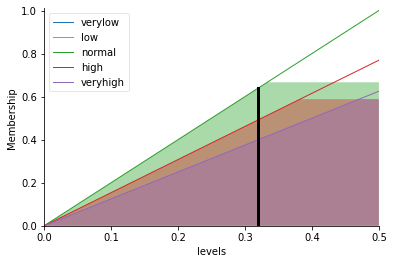

In [4]:
rule1 = ctrl.Rule(places['Ariyalur'] & actual['43.7'] & predicted['101.8'], levels['low'])
rule2 = ctrl.Rule(places['Chennai'] & actual['1.8'] & predicted['58.5'], levels['verylow'])
rule3 = ctrl.Rule(places['Coimbatore'] & actual['170.5'] & predicted['150.3'], levels['normal'])
rule4 = ctrl.Rule(places['Dharmapuri'] & actual['23.3'] & predicted['81.7'], levels['verylow'])
rule5 = ctrl.Rule(places['Dindigul'] & actual['241.0'] & predicted['160.4'], levels['high'])
rule6 = ctrl.Rule(places['Erode'] & actual['151.4'] & predicted['168.0'], levels['normal'])
rule7 = ctrl.Rule(places['Kancheepuram'] & actual['258.4'] & predicted['142.4'], levels['veryhigh'])
rule8 = ctrl.Rule(places['Kanyakumari'] & actual['14.3'] & predicted['66.0'], levels['verylow'])
rule9 = ctrl.Rule(places['Karaikal'] & actual['152.4'] & predicted['288.3'], levels['low'])
rule10 = ctrl.Rule(places['Karur'] & actual['205.3'] & predicted['66.6'], levels['veryhigh'])

leveling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,rule10])
leveling = ctrl.ControlSystemSimulation(leveling_ctrl)
leveling.input['actual'] = 1
leveling.input['predicted'] = 2
leveling.input['places'] = 1.5

leveling.compute()
print(leveling.output['levels']) 
levels.view(sim = leveling)
